# Unsupervised Learning - K-Means Clustering

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [2]:
df_cust = pd.read_csv('Mall_Customers.csv')

In [6]:
df_cust.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
192,193,Male,33,113,8
199,200,Male,30,137,83
102,103,Male,67,62,59
31,32,Female,21,30,73
132,133,Female,25,72,34


`Spending Score (1-100)`: low spends (1) to higher spends (100)

In [7]:
df_cust.shape

(200, 5)

In [8]:
from sklearn.cluster import KMeans

In [9]:
df_cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
select_cols = ['Age','Spending Score (1-100)']

In [11]:
df_cust[select_cols]

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


### Let us plot a scatter plot

### `plt.scatter`

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [18]:
plt.style.use('ggplot')

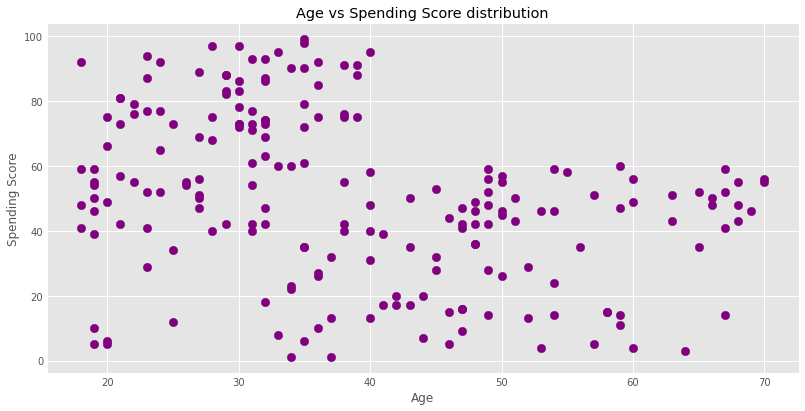

In [27]:
plt.subplots(figsize = (12,6))

plt.scatter(x='Age', y='Spending Score (1-100)', data=df_cust, color='purple', s=70)
plt.title("Age vs Spending Score distribution")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### Deciding the `K-value`

`elbow chart`

- To decide the k-value, we use `elbow chart technique` to determine the optimal number of clusters in K-Means clustering
- It plots cost function produced by different k values
- As k increases, `average distortion/variance will decrease`

### Get 2-D array

In [30]:
elbow = df_cust[['Age', 'Spending Score (1-100)']].iloc[:,:].values #to get the 2-D array

In [31]:
elbow

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [34]:
inertia = [] #create an empty list

In [39]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [40]:
for n in range(1,11):
    algo = KMeans(n_clusters=n, init='k-means++', max_iter=300,tol=0.0001, random_state=45, algorithm='elkan')
    algo.fit(elbow)
    inertia.append(algo.inertia_)

C:\Users\think\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "
C:\Users\think\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


`elkan`: it is an optimization technique for the K-Means clustering which helps to accelerate the convergence of K-means algorithm

`init`: defines the method used to initialize the cluster centroids - k-means++ or random. K-means++ is preferred as it selects initial centroids in such a way that speeds up the convergence of the algorithm

`inertia_`: within-cluster sum of squares (WCCS) - is a metric used to evaluate the goodness of fit of clustering algo.

`tol`: the tolerance for convergence of the algorithm. 


In [42]:
inertia

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23818.41168818787,
 19644.255043202407,
 15514.193134351033,
 13055.626865965582,
 11514.473062196288,
 10115.55182132954]

### Plot the elbow chart

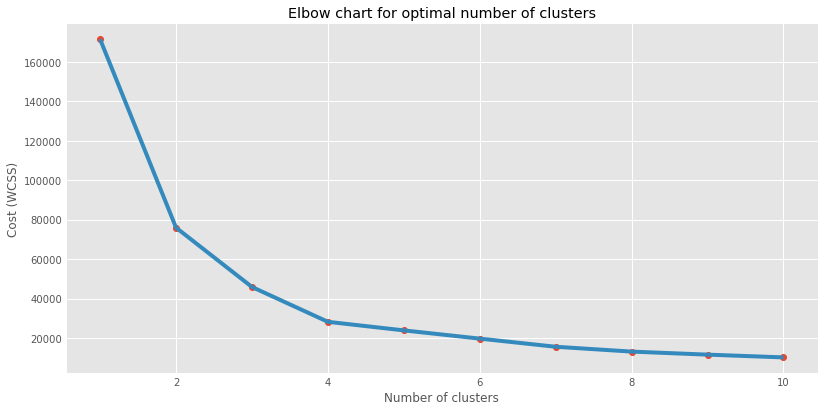

In [48]:
plt.subplots(figsize=(12,6))


plt.plot(np.arange(1,11), inertia, 'o') #align with no. of clusters
plt.plot(np.arange(1,11), inertia, '-')
plt.title('Elbow chart for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Cost (WCSS)')
plt.show()

### Let us start with `K=3`

#### Create `K-Means` object

In [131]:
algo_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, random_state=45, algorithm='elkan')

In [113]:
algo_3 = KMeans(n_clusters=4, init='random', max_iter=500, tol=0.0001, random_state=45, algorithm='elkan')

#### Run `K-Means`clustering

In [132]:
algo_3.fit(elbow) #running the model

KMeans(algorithm='elkan', n_clusters=3, random_state=45)

In [133]:
centroids_1 = algo_3.cluster_centers_

In [134]:
centroids_1

array([[42.95744681, 14.59574468],
       [43.05494505, 47.78021978],
       [29.56451613, 80.74193548]])

In [135]:
labels_1 = algo_3.labels_

In [136]:
labels_1

array([1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [137]:
elbow.shape

(200, 2)

In [138]:
labels_1.shape

(200,)

In [139]:
df_cust = pd.DataFrame(elbow, columns=['Age', 'Spending Score'])

In [140]:
df_cluster_labels = pd.DataFrame(labels_1, columns=['Cluster_Number'])

In [141]:
result= pd.concat([df_cust,df_cluster_labels], axis=1)

In [142]:
result.head(5)

,Age,Spending Score,Cluster_Number
0,19,39,1
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,1


### Plot the clusters

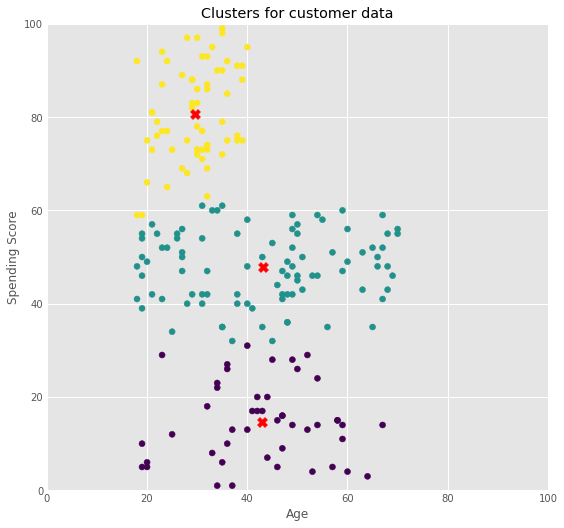

In [145]:
plt.subplots(figsize=(8,8))
plt.scatter(elbow[:,0], elbow[:,1], c=labels_1, cmap='viridis')
plt.scatter(centroids_1[:,0],centroids_1[:,1], marker='X', color='red', s=100)
plt.title("Clusters for customer data")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

# `PLOT SCALE IS REALLY A CRITICAL ANGLE`

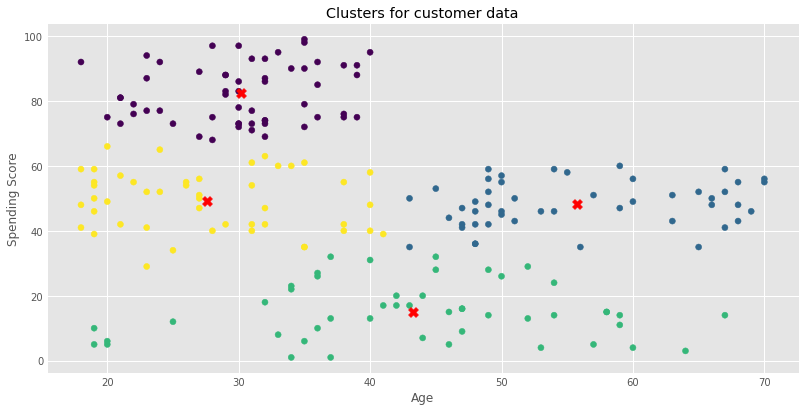

In [125]:
plt.subplots(figsize=(12,6))
plt.scatter(elbow[:,0], elbow[:,1], c=labels_1, cmap='viridis')
plt.scatter(centroids_1[:,0],centroids_1[:,1], marker='X', color='red', s=100)
plt.title("Clusters for customer data")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

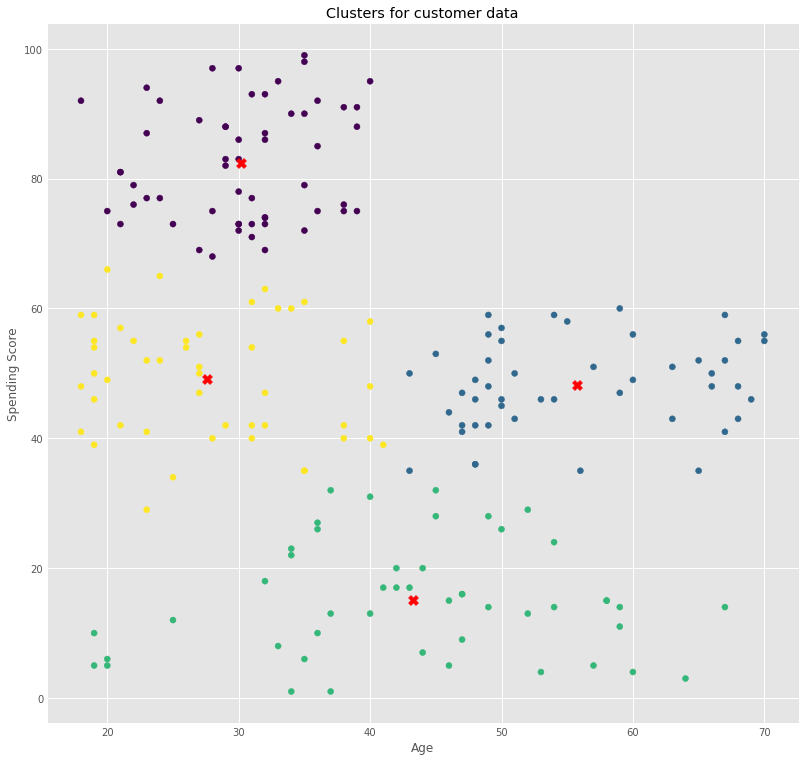

In [130]:
plt.subplots(figsize=(12,12))
plt.scatter(result['Age'], result['Spending Score'], c=result['Cluster_Number'], cmap='viridis')
plt.scatter(centroids_1[:,0],centroids_1[:,1], marker='X', color='red', s=100)
plt.title("Clusters for customer data")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

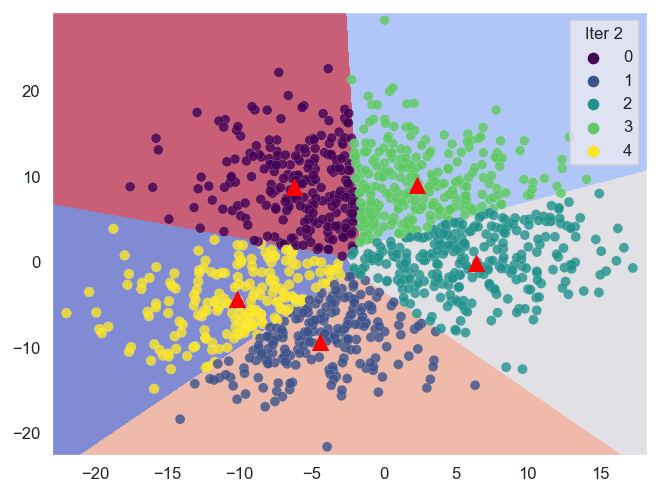